Project 2
---

**By: Bilal Ahmed**

---------------

Overview of Data
---


In [351]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [352]:
# Creating dataframe from csv file
df = pd.read_csv('Food data.csv')

# overview of the data
df.head()#getting the first 5 rows of data

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [353]:
#getting the last five rows
df.tail()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT
1821,1821,5/10/2024,350.0,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables


As it is observed that row entries are not coherent, for example, there is "Meat" and "MEAT", 2 same entries written in different way.

Hence, we will make all the dataset coherent by transforming all entries into lower case.

In [354]:
#transforming all string entries into lower case
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)# here the function stands for apply the function of transforming every string value into lower case. x is such as x is lower if isinstance function is True meaning x is string, otherwise just preserve x.

df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,meat
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat


In the above dataframe, if noticed that no numeric value changed. Another thing to note is missing values, "Nan" is unchanged. Meaning Nan is something of a datatype other than string.

In [355]:
#checking number of rows and columns
df.shape

(1822, 11)

There are 1822 rows and 11 columns

In [356]:
# examining the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [357]:
# checking for any missing values
df.isnull().sum()

ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64

In [358]:
#checking the unique elements in each attribute
df.nunique()

ID                  1822
date                 867
meals_served         373
kitchen_staff         17
temperature_C        892
humidity_percent     867
day_of_week            7
special_event          3
past_waste_kg        867
staff_experience       4
waste_category         6
dtype: int64

Removing ID column as it is not needed for our analysis

In [359]:
df = df.drop(columns=['ID'])
df.head()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,meat
2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat
3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat
4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat


Checking for duplicated rows

In [360]:

# Count of duplicated rows
print(df.duplicated().sum())



768


In [361]:
# Drop duplicates, keeping the second occurrence only
df.drop_duplicates(keep='last', inplace=True)

Reching for duplicated rows

In [362]:
# Count of duplicated rows
print(df.duplicated().sum())

0


In [363]:
df.shape

(1054, 10)

In [364]:
exclude_cols = ['date']  # Column I do not want in the loop below

for col in df.columns:
    if col in exclude_cols:
        continue  


    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): meals_served ---
NaN       3.04%
291.0     1.04%
198.0     0.95%
352.0     0.76%
485.0     0.76%
          ...  
457.0     0.09%
3190.0    0.09%
270.0     0.09%
1070.0    0.09%
395.0     0.09%
Name: meals_served, Length: 374, dtype: object

--- Value counts (%): kitchen_staff ---
12        7.59%
5         7.31%
10        7.31%
13        7.21%
19        6.93%
9         6.64%
15        6.55%
7         6.45%
14        6.26%
18        6.26%
17        5.98%
6         5.98%
11        5.88%
16        5.79%
8          5.6%
NaN       1.71%
ten       0.38%
eleven    0.19%
Name: kitchen_staff, dtype: object

--- Value counts (%): temperature_C ---
-10.000000    1.33%
 60.000000    0.95%
 25.412493    0.19%
 10.521528    0.19%
 29.214995    0.19%
              ...  
 22.022596    0.09%
 11.782007    0.09%
 23.712493    0.09%
 21.081827    0.09%
 23.708015    0.09%
Name: temperature_C, Length: 892, dtype: object

--- Value counts (%): humidity_percent ---
NaN          1.52%
7

Based on the analysis above, I have observed that all columns have negligible missing values, except one column and that is staff_experience. so removing missing values from dataframe except that column.

In [365]:
columns_to_check = df.columns.difference(['staff_experience'])
df = df.dropna(subset=columns_to_check)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 9 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              966 non-null    object 
 1   meals_served      966 non-null    float64
 2   kitchen_staff     966 non-null    object 
 3   temperature_C     966 non-null    float64
 4   humidity_percent  966 non-null    float64
 5   day_of_week       966 non-null    int64  
 6   special_event     966 non-null    object 
 7   past_waste_kg     966 non-null    float64
 8   staff_experience  789 non-null    object 
 9   waste_category    966 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 83.0+ KB


In [367]:
#checking the unique elements in each attribute
df.nunique()

date                864
meals_served        372
kitchen_staff        17
temperature_C       889
humidity_percent    864
day_of_week           7
special_event         3
past_waste_kg       864
staff_experience      4
waste_category        6
dtype: int64

In [368]:
exclude_cols = ['date']  # Column I do not want in the loop below

for col in df.columns:
    if col in exclude_cols:
        continue  


    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): meals_served ---
198.0    1.04%
291.0    1.04%
352.0    0.83%
472.0    0.83%
259.0    0.83%
         ...  
362.0     0.1%
320.0     0.1%
210.0     0.1%
412.0     0.1%
395.0     0.1%
Name: meals_served, Length: 372, dtype: object

--- Value counts (%): kitchen_staff ---
12        8.18%
5         7.45%
10        7.14%
9         7.14%
13        7.14%
15        6.63%
7         6.63%
18        6.63%
19        6.52%
14        6.21%
6         6.21%
11        6.21%
17         5.9%
16        5.69%
8         5.69%
ten       0.41%
eleven    0.21%
Name: kitchen_staff, dtype: object

--- Value counts (%): temperature_C ---
-10.000000    1.24%
 60.000000    0.93%
 29.849743    0.21%
 13.724993    0.21%
 17.264689    0.21%
              ...  
 11.577726     0.1%
 23.135873     0.1%
 11.403403     0.1%
 24.272613     0.1%
 23.708015     0.1%
Name: temperature_C, Length: 889, dtype: object

--- Value counts (%): humidity_percent ---
75.789317    0.41%
87.974605    0.41%
78.443762

Handling missing values in meals served

There is something to note that meals served is in float. However, it is not possible because meals cannot be served in portions/fractions. They are served whole. So it should be an integer data type. Still we can see confirm this by follwoing code.

In [369]:
def is_column_all_integers(df, column_name):

    return (df[column_name]% 1 == 0).all()

if is_column_all_integers(df, 'meals_served'):
    print("All values are whole number")
else:
    print("Some values are fractional")

All values are whole number


As said above, all values are in whole number. So we will be changing it's data type to integer. 

In [370]:
df['meals_served'] = pd.to_numeric(df['meals_served']).astype('Int64')
df['meals_served'].head()

df['meals_served'].unique()

<IntegerArray>
[267, 376, 253, 152, 439, 430, 259, 479, 291, 352,
 ...
 154, 190, 449, 298, 369, 327, 145, 117, 281, 395]
Length: 372, dtype: Int64

Now, when we saw unique entries in kitchen staff, we saw that numbers are written in alphabet form. since these entries were low, so I ran a loop to chnage it into its corresponding numeric value

In [371]:
#Normalizing and map string numbers
word_to_num = {
    'ten': 10,
    'eleven': 11
}

df['kitchen_staff'] = df['kitchen_staff'].astype(str).str.strip().str.lower()
df['kitchen_staff'] = df['kitchen_staff'].replace(word_to_num)

#Converting all to numeric
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')


df['kitchen_staff'].unique()


<IntegerArray>
[7, 19, 17, 8, 18, 13, 12, 16, 5, 9, 14, 10, 15, 6, 11]
Length: 15, dtype: Int64

Doing the same for special event

In [372]:

word_to_num = {
    'one': 1,
}

df['special_event'] = df['special_event'].astype(str).str.strip().str.lower()
df['special_event'] = df['special_event'].replace(word_to_num)

df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce').astype('Int64')


df['special_event'].unique()


<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

Now typecasting the remaining columns in their respective data types

In [373]:
df['temperature_C'] = df['temperature_C'].astype(float)  # Convert to float
df['humidity_percent'] = df['humidity_percent'].astype(float)  # Convert to float
df['day_of_week'] = df['day_of_week'].astype('Int64')    # Convert to int
df['past_waste_kg'] = df['past_waste_kg'].astype(float)    # Convert to int
df['date'] = pd.to_datetime(df['date']) # Convert to datetime

Filling all missing values of column staff_experience with mode of column

In [374]:
mode_value = df['staff_experience'].mode()[0] 
df['staff_experience'].fillna(mode_value, inplace=True)

df['staff_experience'].unique()

array(['expert', 'intermediate', 'beginner', 'pro'], dtype=object)

In [375]:
print(df.columns)

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')


Outlier detection

Column meals_per_staff does not exist in the DataFrame.
Column waste_per_meal does not exist in the DataFrame.
Column temperature_rounded does not exist in the DataFrame.


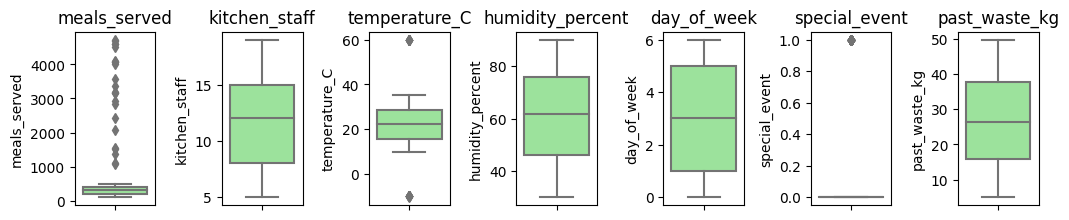

In [376]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col in df.columns:  
        plt.subplot(5, 10, i + 1)
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(col)
    else:
        print(f"Column {col} does not exist in the DataFrame.")
plt.tight_layout()
plt.show()

In the above outliers detection, I am keeping meals served. However, will impute temperature. Also, special event is a binary variable so there is nothing to be done there.

In [377]:
# Define quantile thresholds
lower_quantile = 0.05
upper_quantile = 0.95

# Column to impute
col = 'temperature_C'

# Calculate limits
lower_limit = df[col].quantile(lower_quantile)
upper_limit = df[col].quantile(upper_quantile)

# Clip the outliers
df[col] = np.where(df[col] > upper_limit, upper_limit,
                   np.where(df[col] < lower_limit, lower_limit, df[col]))

So, if we see, the temperature min and max are changed now

Till here we have corrected the datatypes and have imputed/removed missing values and outliers wherever applicable

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 9 to 1821
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              966 non-null    datetime64[ns]
 1   meals_served      966 non-null    Int64         
 2   kitchen_staff     966 non-null    Int64         
 3   temperature_C     966 non-null    float64       
 4   humidity_percent  966 non-null    float64       
 5   day_of_week       966 non-null    Int64         
 6   special_event     966 non-null    Int64         
 7   past_waste_kg     966 non-null    float64       
 8   staff_experience  966 non-null    object        
 9   waste_category    966 non-null    object        
dtypes: Int64(4), datetime64[ns](1), float64(3), object(2)
memory usage: 86.8+ KB


Now for the further analysis, i will be droppiing date column as i think it will not be useful for further analysis of this project

In [379]:
df = df.drop(columns=['date'])
df.head()

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
9,267,7,25.412493,89.405183,1,0,23.067392,expert,grains
12,376,19,10.795566,54.498381,1,0,36.259420,expert,meat
19,253,17,12.768711,42.373044,0,0,6.584683,intermediate,dairy
20,152,8,32.734755,48.530065,0,0,27.156304,expert,grains
22,439,18,13.283378,56.990532,1,0,22.962506,intermediate,dairy


Descriptive statistics

In [380]:
# Descriptive Statistics
numerical_cols = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numerical Columns:")
display(numerical_cols.describe())

Descriptive Statistics for Numerical Columns:


,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,966.0,966.0,966.000000,966.000000,966.0,966.0,966.000000
mean,369.3147,11.888199,22.222284,61.039105,2.969979,0.092133,26.737669
std,487.354653,4.284195,7.259670,17.343847,1.995884,0.289363,12.747442
min,100.0,5.0,10.795566,30.121111,0.0,0.0,5.008394
25%,207.0,8.0,15.700953,46.138856,1.0,0.0,15.891045
50%,303.5,12.0,22.094587,61.905365,3.0,0.0,26.458847
75%,406.0,15.0,28.760838,75.866047,5.0,0.0,37.885228
max,4730.0,19.0,33.997903,89.982828,6.0,1.0,49.803703


c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning

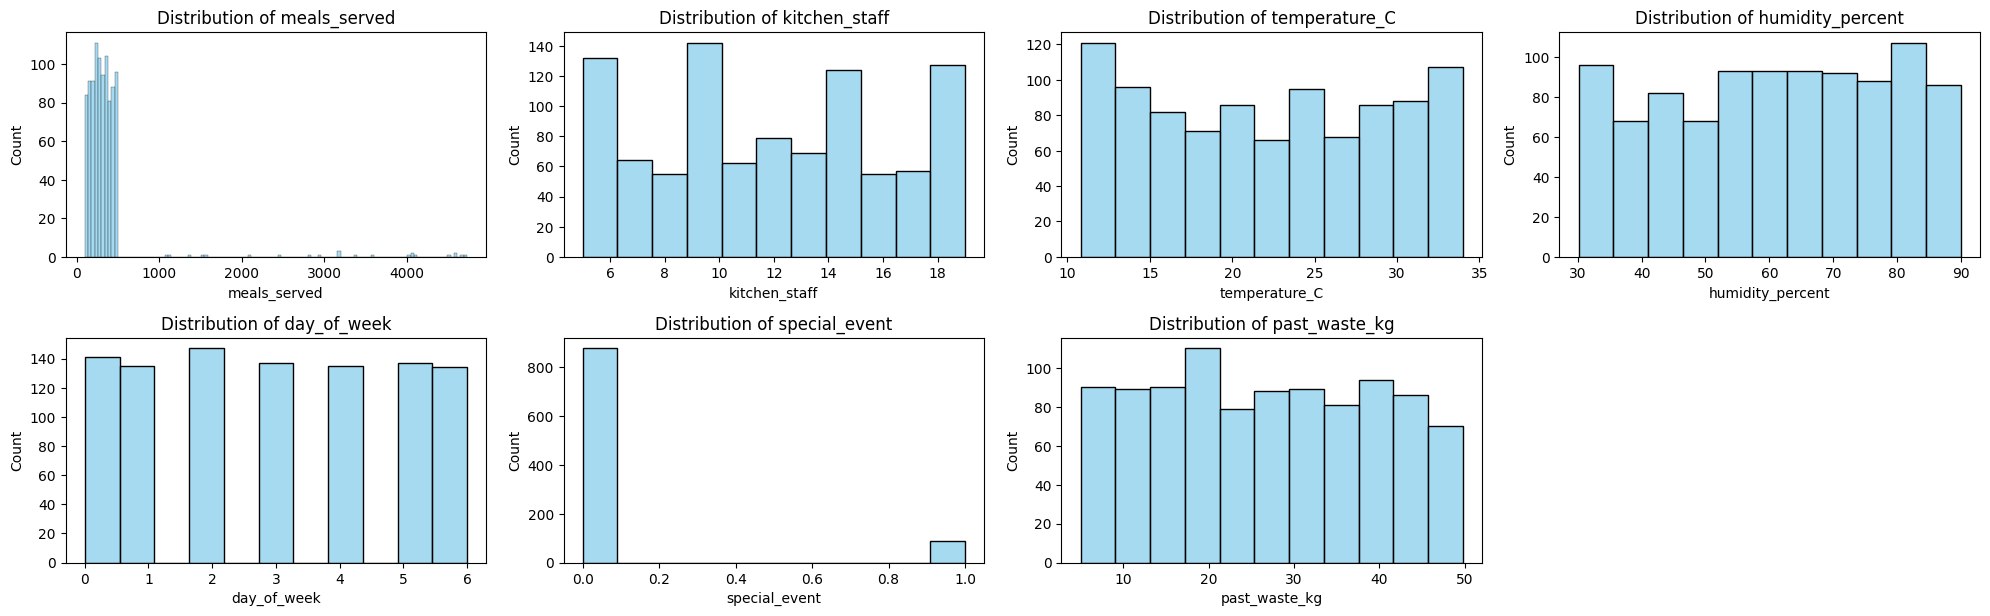

In [381]:
# Data Distribution Visualizations
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()



Value Counts for staff_experience:
intermediate    558
beginner        195
expert          191
pro              22
Name: staff_experience, dtype: int64


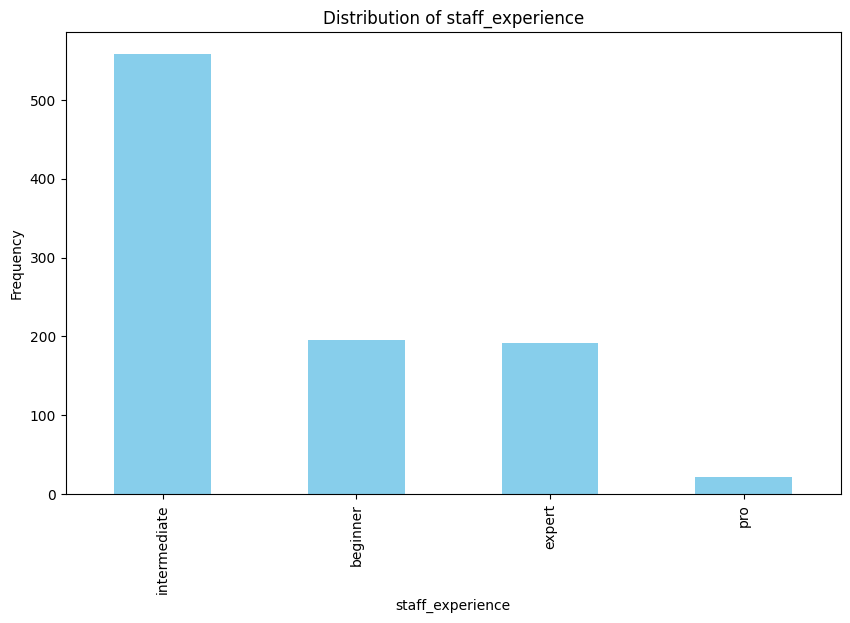


Value Counts for waste_category:
meat          380
grains        203
dairy         180
vegetables    175
wheat          14
barley         14
Name: waste_category, dtype: int64


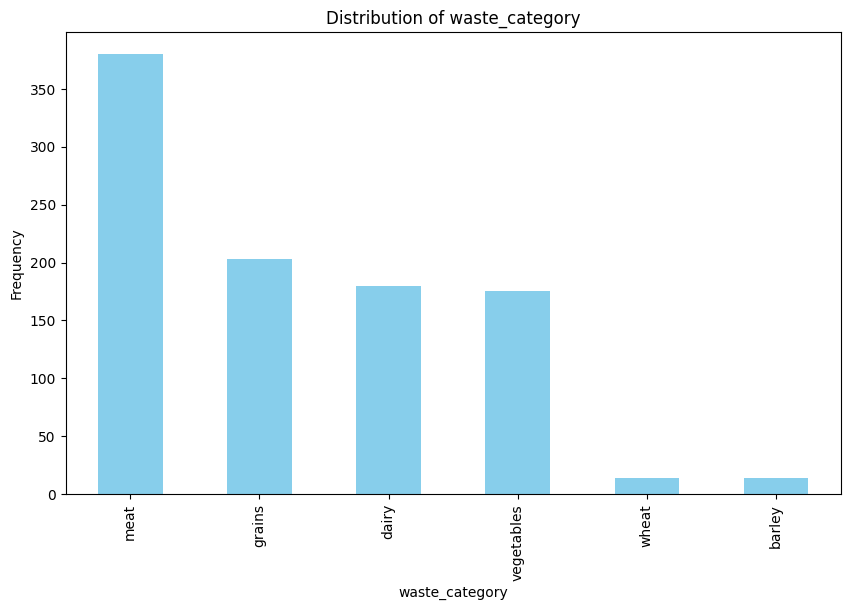

In [382]:
# Categorical Analysis
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))  # Adjust figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


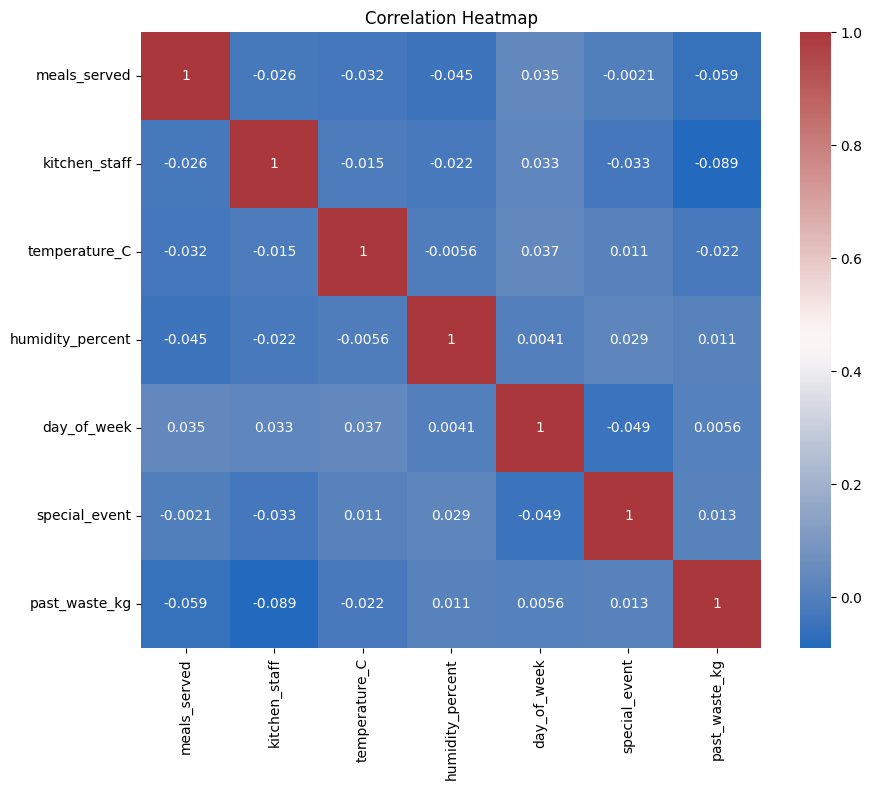

In [383]:
# correlation  between any two variables'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap')
plt.show()

We can see from the correlation matrix that there is no high correlation within variables. 



1. Is there a correlation between the number of meals served and the amount of
food waste?
Answer: No, it's weak correlation

2. Does temperature or humidity influence food waste?
Answer: No, it has weak correlation

Relationships to Explore
---

Meals Served vs. Kitchen Staff

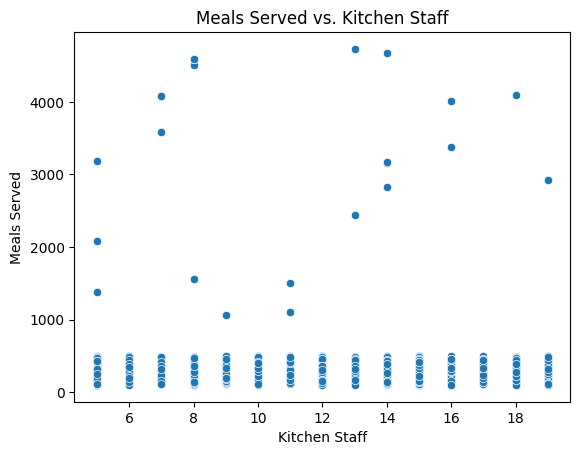

In [384]:
sns.scatterplot(data=df, x="kitchen_staff", y="meals_served")
plt.title("Meals Served vs. Kitchen Staff")
plt.xlabel("Kitchen Staff")
plt.ylabel("Meals Served")
plt.show()

The above visualization suggests that there is not any relationship between meals served and kitchen staff. 

Temperature vs average waste

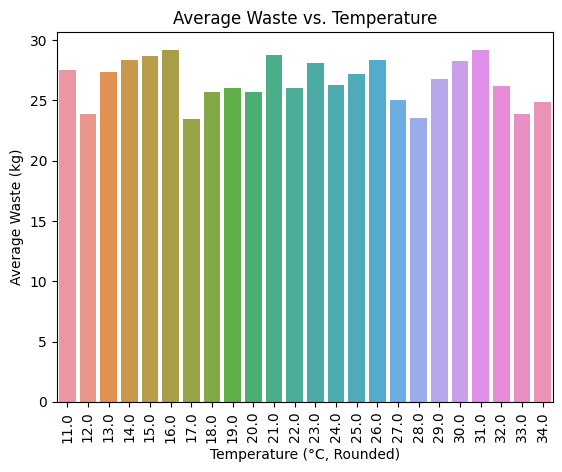

In [385]:
df["temperature_rounded"] = df["temperature_C"].round()

avg_waste_by_temp = df.groupby("temperature_rounded")["past_waste_kg"].mean().reset_index()

sns.barplot(data=avg_waste_by_temp, x="temperature_rounded", y="past_waste_kg")
plt.title("Average Waste vs. Temperature")
plt.xlabel("Temperature (°C, Rounded)")
plt.ylabel("Average Waste (kg)")
plt.xticks(rotation=90)
plt.show()

The above visualization suggests that there is no relationship between average waste and temperature.

waste and special event

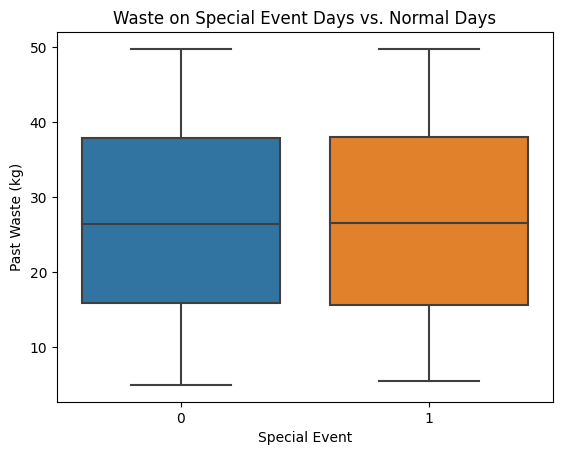

In [386]:
sns.boxplot(data=df, x="special_event", y="past_waste_kg")
plt.title("Waste on Special Event Days vs. Normal Days")
plt.xlabel("Special Event")
plt.ylabel("Past Waste (kg)")
plt.show()

There is no difference in waste either its a special event or not.

Distribution of meals per staff

c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Bilal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


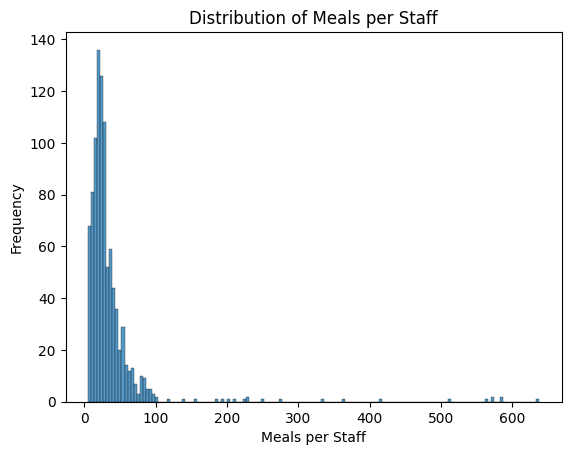

In [387]:
df["meals_per_staff"] = df["meals_served"] / df["kitchen_staff"]
sns.histplot(df["meals_per_staff"])
plt.title("Distribution of Meals per Staff")
plt.xlabel("Meals per Staff")
plt.ylabel("Frequency")
plt.show()

Average food waste and kitchen staff

The above visualization suggests that more the kitchen staff, the less meals per staff will be served.

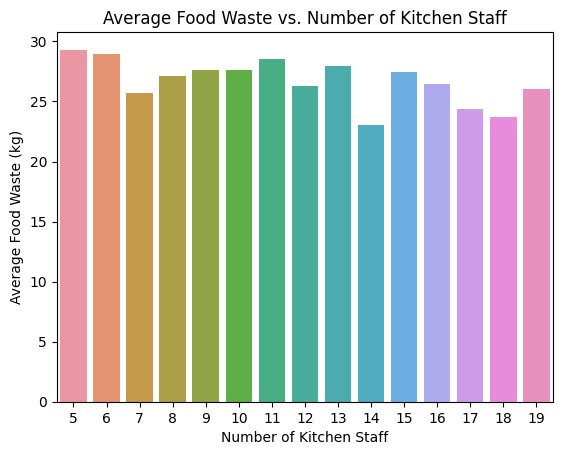

In [388]:
avg_waste_by_staff = df.groupby("kitchen_staff")["past_waste_kg"].mean().reset_index()

sns.barplot(data=avg_waste_by_staff, x="kitchen_staff", y="past_waste_kg")
plt.title("Average Food Waste vs. Number of Kitchen Staff")
plt.xlabel("Number of Kitchen Staff")
plt.ylabel("Average Food Waste (kg)")
plt.show()